# Example 7: Maximum Power Transfer Theorem


<p><strong>Authors:</strong><br>
Sania Dolat, Ali Saadatpour</p>

<p><strong>Contacts:</strong><br>
its.saniadlt@gmail.com<br>
Qstzen@proton.me</p>


<p>Objective:</p>
<p>To investigate and verify that maximum power is delivered to a load resistor when the load resistance 
<i>R</i><sub>LOAD</sub> is equal to the Thevenin resistance <i>R</i><sub>TH</sub> of the circuit.</p>


<p>The maximum power transfer theorem states that maximum power is delivered to the load when the resistance of the load 
<i>R</i><sub>LOAD</sub> is equal to the Thevenin equivalent resistance <i>R</i><sub>TH</sub> of the circuit supplying the power. 
This is an essential concept in electrical engineering, particularly in designing circuits for efficient power delivery.</p>


<p>When a circuit is simplified using Thevenin’s theorem, it consists of:</p>

<ul>
    <li>Thevenin equivalent voltage source ( <i>V</i><sub>TH</sub> ) : This is the open-circuit voltage seen from the load terminals.</li>  
    <li>Thevenin equivalent resistance ( <i>R</i><sub>TH</sub> ) : This is the resistance seen by the load when all independent voltage sources are replaced by short circuits and current sources by open circuits.</li>
</ul>


<p><strong>Theory:</strong><br>
The power delivered to the load <i>R</i><sub>TH</sub> is given by the following formula:</p>

$$
\begin{aligned}
P_{\mathrm{LOAD}} &= \frac{V_{\mathrm{TH}}^2}{\left(R_{\mathrm{TH}} + R_{\mathrm{LOAD}}\right)^2} \cdot R_{\mathrm{LOAD}} \\
\end{aligned}
$$


<ul>
    <li><i>V</i><sub>TH</sub>: Thevenin equivalent voltage (constant).</li>  
    <li><i>R</i><sub>TH</sub>: Thevenin equivalent resistance (constant).</li>  
    <li><i>R</i><sub>LOAD</sub>: Load resistance (variable).</li>
</ul>


<p>The goal is to calculate and plot the power delivered to <i>R</i><sub>TH</sub> for different values of 
<i>R</i><sub>TH</sub>, and show that maximum power is transferred when <i>R</i><sub>LOAD</sub> = <i>R</i><sub>TH</sub>.</p>


​

We use the previous example for this theory : 

In [1]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Logging.Logging import setup_logging

# Enable logging for PySpice
setup_logging()

# Create the Thevenin circuit
thevenin_circuit = Circuit('Thevenin Circuit')

# Define the components
thevenin_circuit.V(1, '1', thevenin_circuit.gnd, 10@u_V)  # 10V voltage source
thevenin_circuit.I(1, '2', '3', 100@u_mA)  # 0.1A current source
thevenin_circuit.R(1, '1', thevenin_circuit.gnd, 1@u_kΩ)  # Resistors
thevenin_circuit.R(2, '1', '2', 1@u_kΩ)
thevenin_circuit.R(3, '3', thevenin_circuit.gnd, 1@u_kΩ)
thevenin_circuit.R(4, '2', thevenin_circuit.gnd, 1@u_kΩ)
thevenin_circuit.R(5, '2', 'a', 1@u_kΩ)  # Load resistor connection
thevenin_circuit.R(6, 'a', thevenin_circuit.gnd, 1@u_kΩ)

Resistor R6

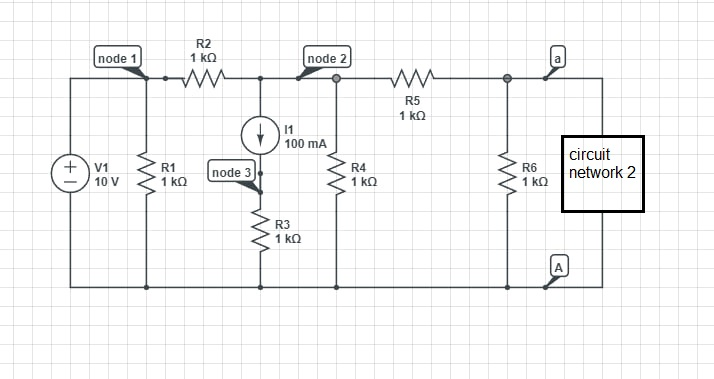

<p>Consider Network 2 as <i>R</i><sub>LOAD</sub>.</p>


## Part 1: Thevenin Equivalent Calculation ##

<ol>
    <li><strong>Circuit Analysis:</strong></li>
    <p>Given any complex circuit, find the Thevenin equivalent circuit. This is done by following these steps:</p>  

<p><strong>Step 1:</strong></p>
<p> Find the open-circuit voltage across the load terminals <i>V</i><sub>TH</sub>.</p>
</ol>


In [25]:
simulator = thevenin_circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

thevenin_voltage = float(analysis['a'])
print(f'Thevenin Voltage (Vth) = {thevenin_voltage:.2f} V')

Thevenin Voltage (Vth) = -18.00 V


C:\Users\sinat\AppData\Local\Temp\ipykernel_19228\323703168.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  thevenin_voltage = float(analysis['a'])


<ol>
    <p><strong>Step 2:</strong></p>
    <p>Replace all voltage sources with short circuits and all current sources with open circuits. Find the equivalent resistance looking into the circuit from the load terminals.</p>
</ol>


In [26]:
thevenin_circuit.V1.dc_value = 0  # Short-circuit the voltage source
thevenin_circuit.I1.dc_value = 0  # Open-circuit the current source

thevenin_circuit.I(2, 'a', thevenin_circuit.gnd, 1@u_uA)  # 1 µA test current source

# Perform DC analysis again to measure voltage across 'a'
simulator = thevenin_circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

# The voltage across node 'a' is used to calculate the Thevenin resistance
voltage_test = float(analysis['a'])
thevenin_resistance = abs(voltage_test / 1e-6)  # Rth = V_test / I_test (1 µA = 1e-6 A)

print(f'Thevenin Resistance (Rth) = {thevenin_resistance:.2f} Ω')

Thevenin Resistance (Rth) = 600.00 Ω


C:\Users\sinat\AppData\Local\Temp\ipykernel_19228\302438453.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  voltage_test = float(analysis['a'])


<ul>
    <li>The Thevenin resistance is calculated using Ohm's Law:</li>
</ul>

$$
\begin{aligned}
R_{\mathrm{TH}} &= \frac{V_{\text{test}}}{I_{\text{test}}}
\end{aligned}
$$

<ul>
    <li><i>R</i><sub>TH</sub> is printed out for reference.</li>
</ul>



<h4>Part 2: Power Calculation, Simulation & Graphical Representation</h4>

<p><strong>Power Calculation:</strong><br>
For each value of <i>R</i><sub>LOAD</sub>, calculate the power delivered to the load using the formula:</p>

$$
\begin{aligned}
P_{\mathrm{LOAD}} &= \frac{V_{\mathrm{TH}}^2}{\left(R_{\mathrm{TH}} + R_{\mathrm{LOAD}}\right)^2} \cdot R_{\mathrm{LOAD}} \\
\end{aligned}
$$


<p>Calculate the power for different values of <i>R</i><sub>TH</sub>, ranging from 0.1×<i>R</i><sub>TH</sub> to 10×<i>R</i><sub>TH</sub>.</p>

<p>We can observe that the power peaks when <i>R</i><sub>TH</sub> = <i>R</i><sub>LOAD</sub> .</p>

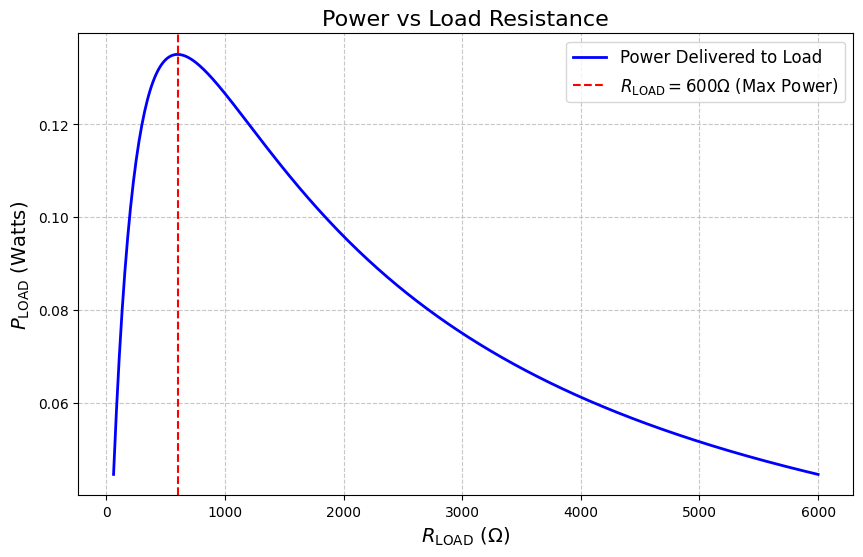

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Given values from previous simulation or manually assigned
V_TH = thevenin_voltage  # Thevenin voltage calculated earlier
R_TH = thevenin_resistance  # Thevenin resistance calculated earlier (600 Ω)

# Range of load resistances (60 Ohm to 6000 Ohms)
R_LOAD_values = np.linspace(60, 6000, 500)  # 500 values between 60Ω and 6000Ω

# Calculate the power delivered to the load for each R_LOAD
power_values = (V_TH**2 * R_LOAD_values) / (R_TH + R_LOAD_values)**2

# Plot the power as a function of load resistance
plt.figure(figsize=(10, 6))
plt.plot(R_LOAD_values, power_values, label='Power Delivered to Load', color='b', linewidth=2)

# Mark the point where R_LOAD = 600 Ohms
plt.axvline(600, color='r', linestyle='--', label='$R_{\\mathrm{LOAD}} = 600 \\Omega$ (Max Power)')

# Add labels and title
plt.xlabel('$R_{\\mathrm{LOAD}} \\ (\\Omega)$', fontsize=14)
plt.ylabel('$P_{\\mathrm{LOAD}} \\ (\\mathrm{Watts})$', fontsize=14)
plt.title('Power vs Load Resistance', fontsize=16)

# Customize grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.show()


<ul>
    <li>This block calculates the power delivered to the load resistor <i>R</i><sub>LOAD</sub> over a range of values (60 Ω to 6000 Ω).</li>  
    <li>The power values are plotted as a function of <i>R</i><sub>LOAD</sub>.</li>  
    <li>A red dashed vertical line is drawn at <i>R</i><sub>LOAD</sub> = 600 Ω to highlight the maximum power point.</li>
</ul>


<h4>Part 3: Questions</h4>

<h3>Why does maximum power occur when <i>R<sub>TH</sub> = R<sub>LOAD</sub>?</i></h3>

<p>The Maximum Power Transfer Theorem states that maximum power is delivered to a load when the load resistance <i>R<sub>LOAD</sub></i> matches the Thevenin resistance <i>R<sub>TH</sub></i> of the source.</p>

<p>Here's why this happens:</p>

<p>The power delivered to the load is given by:</p>

$$
\begin{aligned}
P_{\mathrm{LOAD}} &= \frac{V_{\mathrm{TH}}^2}{\left(R_{\mathrm{TH}} + R_{\mathrm{LOAD}}\right)^2} \cdot R_{\mathrm{LOAD}} \\
\end{aligned}
$$

<p>Where <i>V<sub>TH</sub></i> is the Thevenin equivalent voltage, <i>R<sub>TH</sub></i> is the Thevenin equivalent resistance, and <i>R<sub>LOAD</sub></i> is the load resistance.</p>

<p>When <i>R<sub>LOAD</sub> = R<sub>TH</sub></i>, the denominator in the equation is minimized, maximizing the overall power delivered to the load.</p>

<p>If <i>R<sub>LOAD</sub></i> is too small or too large, the voltage drop across the load decreases, and either too much power is dissipated in <i>R<sub>TH</sub></i> (if <i>R<sub>LOAD</sub></i> is too small) or the current decreases (if <i>R<sub>LOAD</sub></i> is too large), leading to less power being delivered to the load.</p>

<p>In essence, when the load and source resistances are matched, the circuit is impedance-matched, which allows maximum energy transfer from the source to the load.</p>

<h3>Mathematical Proof of the Maximum Power Transfer Theorem</h3>

<h4>1. Power Delivered to the Load:</h4>
<p>The power delivered to the load <i>P<sub>LOAD</sub></i> is given by the following formula:</p>

$$
\begin{aligned}
P_{\mathrm{LOAD}} &= I_{\mathrm{LOAD}}^2 \cdot R_{\mathrm{LOAD}} \\
\end{aligned}
$$

<p>Where <i>I<sub> LOAD</sub></i> is the current through the load resistor.</p>

<p>From Ohm's law, the current in the circuit is:</p>

$$
\begin{aligned}
I_{\mathrm{LOAD}} &= \frac{V_{\mathrm{TH}}}{R_{\mathrm{TH}} + R_{\mathrm{LOAD}}} \\
\end{aligned}
$$

<p>Substitute this into the power formula:</p>

$$
\begin{aligned}
P_{\mathrm{LOAD}} &= \left( \frac{V_{\mathrm{TH}}}{R_{\mathrm{TH}} + R_{\mathrm{LOAD}}} \right)^2 \cdot R_{\mathrm{LOAD}} \\
\end{aligned}
$$

<h4>2. Differentiating Power with Respect to <i>R<sub>LOAD</sub></i>:</h4>
<p>To find the condition for maximum power, we differentiate <i>P<sub>LOAD</sub></i> with respect to <i>R<sub>LOAD</sub></i> and set the derivative equal to 0:</p>

$$
\begin{aligned}
\frac{d}{dR_{\mathrm{LOAD}}} \left( \frac{V_{\mathrm{TH}}^2 \cdot R_{\mathrm{LOAD}}}{(R_{\mathrm{TH}} + R_{\mathrm{LOAD}})^2} \right) &= 0 \\
\end{aligned}
$$

<h4>3. Applying the Quotient Rule:</h4>
<p>Let <i>f(R<sub>LOAD</sub>) = V<sub>TH</sub><sup>2</sup> &middot; R<sub>LOAD</sub></i> and <i>g(R<sub>LOAD</sub>) = (R<sub>TH</sub> + R<sub>LOAD</sub>)<sup>2</sup></i>, so the power can be rewritten as:</p>

$$
\begin{aligned}
P_{\mathrm{LOAD}} &= \frac{f(R_{\mathrm{LOAD}})}{g(R_{\mathrm{LOAD}})} \\
\end{aligned}
$$

<p>Using the quotient rule for differentiation:</p>

$$
\begin{aligned}
\frac{d}{dR_{\mathrm{LOAD}}} \left( \frac{f(R_{\mathrm{LOAD}})}{g(R_{\mathrm{LOAD}})} \right) &= \frac{f'(R_{\mathrm{LOAD}}) \cdot g(R_{\mathrm{LOAD}}) - f(R_{\mathrm{LOAD}}) \cdot g'(R_{\mathrm{LOAD}})}{g(R_{\mathrm{LOAD}})^2} \\
\end{aligned}
$$

<p>Now, calculate the derivatives:</p>

$$
\begin{aligned}
f'(R_{\mathrm{LOAD}}) &= V_{\mathrm{TH}}^2 \\
g'(R_{\mathrm{LOAD}}) &= 2(R_{\mathrm{TH}} + R_{\mathrm{LOAD}}) \\
\end{aligned}
$$

<p>Substitute these into the quotient rule formula:</p>

$$
\begin{aligned}
\frac{dP_{\mathrm{LOAD}}}{dR_{\mathrm{LOAD}}} &= \frac{V_{\mathrm{TH}}^2 \cdot (R_{\mathrm{TH}} + R_{\mathrm{LOAD}})^2 - V_{\mathrm{TH}}^2 \cdot R_{\mathrm{LOAD}} \cdot 2(R_{\mathrm{TH}} + R_{\mathrm{LOAD}})}{(R_{\mathrm{TH}} + R_{\mathrm{LOAD}})^4} \\
\end{aligned}
$$

<h4>4. Conclusion:</h4>
<p>For maximum power, set the derivative equal to 0:</p>

$$
\begin{aligned}
R_{\mathrm{TH}}^2 - R_{\mathrm{LOAD}}^2 &= 0 \\
\end{aligned}
$$

<p>This gives:</p>

$$
\begin{aligned}
R_{\mathrm{TH}} &= R_{\mathrm{LOAD}} \\
\end{aligned}
$$

<p>Thus, the power delivered to the load is maximized when:</p>

$$
\begin{aligned}
R_{\mathrm{TH}} &= R_{\mathrm{LOAD}}
\end{aligned}
$$



<h3>What happens to the power delivered when <i>R<sub>LOAD</sub></i> is much larger or smaller than <i>R<sub>TH</sub> ?</h3>

<h4>When <i>R<sub>LOAD</sub></i> is much smaller than <i>R<sub>TH</sub> :</h4>

<p>If the load resistance <i>R<sub>LOAD</sub></i> is much smaller than the Thevenin resistance <i>R<sub>TH</sub></i>, most of the voltage will drop across <i>R<sub>TH</sub></i>, and only a small portion of the voltage will drop across <i>R<sub>LOAD</sub></i> .</p>

<p>This results in a higher current, but because the voltage drop across <i>R<sub>LOAD</sub></i> is small, the power delivered to the load is also small .</p>

<p>In this case, the circuit behaves as if it is "shorted," and most of the power is dissipated in the internal resistance <i>R<sub>TH</sub></i>, not in the load .</p>

<h4>When <i>R<sub>LOAD</sub></i> is much larger than <i>R<sub>TH</sub> :</h4>

<p>If the load resistance <i>R<sub>LOAD</sub></i> is much larger than the Thevenin resistance <i>R<sub>TH</sub></i>, the current in the circuit will be very small, since total resistance increases significantly . </p>

<p>Even though most of the voltage will drop across <i>R<sub>LOAD</sub></i> , the small current results in less power delivered to the load.</p>

<p>The circuit behaves as if it is "open" or "highly resistive," causing minimal power transfer .</p>

<h4>Conclusion :</h4>

<p>In both cases (too small or too large <i>R<sub>LOAD</sub></i>), the power delivered to the load is less than the maximum, which occurs when <i>R<sub>LOAD</sub> = R<sub>TH</sub></i> .</p>
